In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

Cm = 1
g_Na, g_K, g_L, = 120, 36, 0.3
E_Na, E_K, E_L = 60, -88, -54.387

In [47]:
def alpha_n(V): return 0.01*(V+55)/(1-np.exp(-(V+55)/10))
def beta_n(V): return 0.125*np.exp(-(V+65)/80)
def alpha_m(V): return 0.1*(V+40)/(1-np.exp(-(V+40)/10))
def beta_m(V): return 4*np.exp(-(V+65)/18)
def alpha_h(V): return 0.07*np.exp(-(V+65)/20)
def beta_h(V): return 1/(1+np.exp(-(V+35)/10))

In [48]:
def I_Na(V, m, h): return g_Na * m**3 * h * (V-E_Na)
def I_K(V, n): return g_K * n**4 * (V- E_K)
def I_L(V): return g_L * (V-E_L)

In [49]:
t = np.arange(0, 450, 0.01)
def I_inj(t):
    return 10*(t>100)-10*(t>200)+35*(t>300)-35*(t>400)

In [50]:
def dALLdt(X,t):
    V, m, h, n = X
    dVdt = (I_inj(t)-I_Na(V, m, h)-I_K(V, n) - I_L(V))/Cm
    dndt = alpha_n(V)*(1-n) - beta_n(V)*n
    dmdt = alpha_m(V)*(1-m) - beta_m(V)*m
    dhdt = alpha_h(V)*(1-h) - beta_h(V)*h
    return dVdt, dmdt, dhdt, dndt
    
X = odeint(dALLdt, [-65, 0.05, 0.6, 0.32], t)
V = X[:,0]
m = X[:,1]
h = X[:,2]
n = X[:,3]
ina = I_Na(V,m,h)
ik = I_K(V, n)
il = I_L(V)

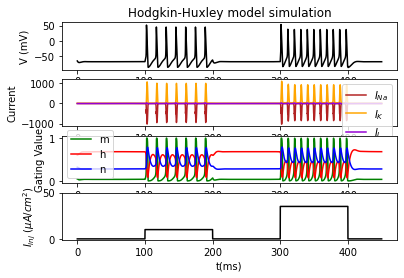

In [51]:
plt.figure()

plt.subplot(4,1,1)
plt.title('Hodgkin-Huxley model simulation')
plt.plot(t, V, 'k')
plt.ylabel('V (mV)')

plt.subplot(4,1,2)
plt.plot(t, ina, 'firebrick', label='$I_{Na}$')
plt.plot(t, ik, 'orange', label = '$I_{K}$')
plt.plot(t, il, 'darkviolet', label='$I_{L}$')
plt.ylabel('Current')
plt.legend()

plt.subplot(4,1,3)
plt.plot(t, m, 'g', label='m')
plt.plot(t, h, 'r', label='h')
plt.plot(t, n, 'b', label='n')
plt.ylabel('Gating Value')
plt.legend()

plt.subplot(4,1,4)
plt.plot(t, I_inj(t), 'k')
plt.xlabel('t(ms)')
plt.ylabel('$I_{inj}$ ($\\mu{A}/cm^2$)')
plt.ylim(-1, 50)

plt.show()